In [9]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [10]:
!ls

Airline Delays, 2004-2019.ipynb complaints.xlsx
airline_delay_causes.csv


In [11]:
df = pd.read_csv("airline_delay_causes.csv")

In [12]:
#Worst airlines
#Worst airports
#Delays by cause
#Minutes of delays
#Worst years
#Climate change impact
#Worst months to fly into and out of NYC
#Most likely reasons of delays

In [13]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,5,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1296.0,277.0,66.43,4.00,...,0.23,39.98,1.0,6.0,13201.0,4795.0,409.0,5761.0,8.0,2228.0
1,2004,5,B6,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",2684.0,461.0,70.67,1.32,...,12.11,187.11,1.0,8.0,20322.0,3605.0,36.0,6773.0,449.0,9459.0
2,2004,5,CO,Continental Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",31.0,5.0,0.72,1.00,...,0.00,0.00,0.0,0.0,278.0,86.0,73.0,119.0,0.0,0.0
3,2004,5,DH,Atlantic Coast Airlines,JFK,"New York, NY: John F. Kennedy International",445.0,96.0,30.73,3.40,...,0.00,37.25,8.0,2.0,7433.0,1986.0,471.0,1728.0,0.0,3248.0
4,2004,5,DL,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1175.0,317.0,51.60,1.93,...,0.85,35.31,3.0,2.0,13689.0,3113.0,57.0,8289.0,28.0,2202.0


In [14]:
df.groupby(by='carrier_name').arr_flights.sum()

carrier_name
ATA Airlines d/b/a ATA           11082.0
AirTran Airways Corporation      66936.0
Alaska Airlines Inc.             24000.0
Allegiant Air                      863.0
America West Airlines Inc.        9202.0
American Airlines Inc.          606032.0
American Eagle Airlines Inc.    263283.0
Atlantic Coast Airlines           5072.0
Atlantic Southeast Airlines      11238.0
Comair Inc.                     212493.0
Continental Air Lines Inc.      435689.0
Delta Air Lines Inc.            746451.0
Endeavor Air Inc.                80425.0
Envoy Air                        61532.0
ExpressJet Airlines Inc.        708381.0
ExpressJet Airlines LLC           2891.0
Frontier Airlines Inc.           13890.0
Hawaiian Airlines Inc.            2409.0
Independence Air                  7590.0
JetBlue Airways                 825112.0
Mesa Airlines Inc.               23973.0
Northwest Airlines Inc.          73105.0
PSA Airlines Inc.                 3420.0
Pinnacle Airlines Inc.           22070.0
Rep

In [15]:
!ls

Airline Delays, 2004-2019.ipynb complaints.xlsx
airline_delay_causes.csv


In [18]:
df2 = pd.read_excel("complaints.xlsx")

In [19]:
df2.head()

,Month,Complaints
0,2018-05-01,13166
1,2018-06-01,10528
2,2018-07-01,10242
3,2018-08-01,13583
4,2018-09-01,15913


In [24]:
df2['date'] = df2['Month'].dt.strftime('%m/%Y')


In [25]:
df2.head()

,Month,Complaints,date
0,2018-05-01,13166,05/2018
1,2018-06-01,10528,06/2018
2,2018-07-01,10242,07/2018
3,2018-08-01,13583,08/2018
4,2018-09-01,15913,09/2018


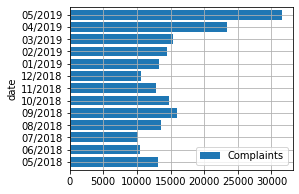

In [29]:
df2.plot(x='date', 
         y='Complaints', 
         kind='barh', 
         figsize = (4,3),
         width=0.8,
         grid=True)
plt.savefig('complaints.pdf')